In [1]:
import sys
sys.path.insert(1, "../../ptrms/")

In [2]:
import rdkit
import rdkit.Chem
import rdkit.Chem.PandasTools
import pandas as pd
# from cheminformatics import molfile

RDKit WARNING: [11:39:20] Enabling RDKit 2019.09.3 jupyter extensions


In [3]:
from cheminformatics import molfile

https://camkirk.medium.com/rdkit-simple-file-input-and-output-e6764fc1e35c

## Importing Testfile

In [4]:
test_df = pd.read_csv("../2021_03_08_rdkit_test/input/MasterList_PostOpen_Refine.csv")

In [5]:
test_df.head(n=11)

,Compound Name,InChI
0,MBOA (Coixol),InChI=1S/C8H7NO3/c1-11-5-2-3-6-7(4-5)12-8(10)9...
1,HDMBOA-glucoside,InChI=1S/C16H21NO10/c1-23-7-3-4-8-9(5-7)25-16(...
2,HDMBOA-glucoside-like (410 version - adduct?),InChI=1S/C16H21NO10/c1-23-7-3-4-8-9(5-7)25-16(...
3,DIMBOA(a),InChI=1S/C9H9NO5/c1-14-5-2-3-6-7(4-5)15-9(12)8...
4,DIMBOA(b),InChI=1S/C9H9NO5/c1-14-5-2-3-6-7(4-5)15-9(12)8...
5,DIBOA,InChI=1S/C8H7NO4/c10-7-8(11)13-6-4-2-1-3-5(6)9...
6,ABOA,InChI=1S/C9H7NO3/c1-5(11)6-3-2-4-7-8(6)10-9(12...
7,ABOA-like compound,InChI=1S/C9H7NO3/c1-5(11)6-3-2-4-7-8(6)10-9(12...
8,HMBOA(a),InChI=1S/C9H9NO4/c1-13-5-2-3-6-7(4-5)14-9(12)8...
9,HMBOA(b),InChI=1S/C9H9NO4/c1-13-5-2-3-6-7(4-5)14-9(12)8...


In [6]:
test_df.tail()

,Compound Name,InChI
899,GLYCEROL-MYRISTATE,InChI=1S/C17H34O4/c1-2-3-4-5-6-7-8-9-10-11-12-...
900,TRICOSANOATE,InChI=1S/C23H46O2/c1-2-3-4-5-6-7-8-9-10-11-12-...
901,COENZYME Q10,InChI=1S/C59H90O4/c1-44(2)24-15-25-45(3)26-16-...
902,CORTISONE,InChI=1S/C21H28O5/c1-19-7-5-13(23)9-12(19)3-4-...
903,DECANOATE (NEG),InChI=1S/C10H20O2/c1-2-3-4-5-6-7-8-9-10(11)12/...


## Inputting InChi in Rdkit

In [7]:
test_InChi = test_df["InChI"][0]

In [8]:
test_InChi

'InChI=1S/C8H7NO3/c1-11-5-2-3-6-7(4-5)12-8(10)9-6/h2-4H,1H3,(H,9,10)'

In [9]:
test_m = rdkit.Chem.inchi.MolFromInchi(test_InChi)

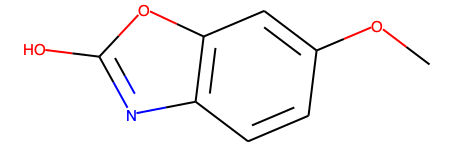

In [10]:
test_m

In [11]:
test_m.SetProp("_Name", test_df["Compound Name"][0])

In [12]:
molblock_string = rdkit.Chem.MolToMolBlock(test_m)

In [13]:
print(molblock_string)

MBOA (Coixol)
     RDKit          2D

 12 13  0  0  0  0  0  0  0  0999 V2000
    3.0000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1240   -1.8037    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7537   -2.4138    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4231   -2.5537    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9672   -0.3119    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1 11  1  0
  2  3  2  0
  2  5  1  0
  3  6  1  0
  4  5  2  0
  4  7  1  0
  5 

## Making a new column for Mol Object

- We'll be using Pandas `apply` function that lets us use columns from the dataframe to create new columns
    - Since we'll be using two column, we must create our own function

In [14]:
def MolfromInchi_for_dataframe_column(row, name_column="Compound Name", InChI_column="InChI", **rdkit_param): 
    """
    Transforms the InChI string from a Pandas Dataframe row into a Mol object.
    Updates the Name property with the associated compound name from a different column
    
    Parameters
    ----------
    row: Pandas Dataframe Row 
    name_column: str 
    InChI_column: str
    **rdkit_param

    Returns
    -------
    Rdkit Mol Object with Name property that corresponds to the compound name
    """
    try:
        mol_object = rdkit.Chem.inchi.MolFromInchi(row[InChI_column], **rdkit_param)
        mol_object.SetProp("_Name", row[name_column])
        return mol_object
    except:
        return None

In [15]:
test_df.head(n=13)

,Compound Name,InChI
0,MBOA (Coixol),InChI=1S/C8H7NO3/c1-11-5-2-3-6-7(4-5)12-8(10)9...
1,HDMBOA-glucoside,InChI=1S/C16H21NO10/c1-23-7-3-4-8-9(5-7)25-16(...
2,HDMBOA-glucoside-like (410 version - adduct?),InChI=1S/C16H21NO10/c1-23-7-3-4-8-9(5-7)25-16(...
3,DIMBOA(a),InChI=1S/C9H9NO5/c1-14-5-2-3-6-7(4-5)15-9(12)8...
4,DIMBOA(b),InChI=1S/C9H9NO5/c1-14-5-2-3-6-7(4-5)15-9(12)8...
5,DIBOA,InChI=1S/C8H7NO4/c10-7-8(11)13-6-4-2-1-3-5(6)9...
6,ABOA,InChI=1S/C9H7NO3/c1-5(11)6-3-2-4-7-8(6)10-9(12...
7,ABOA-like compound,InChI=1S/C9H7NO3/c1-5(11)6-3-2-4-7-8(6)10-9(12...
8,HMBOA(a),InChI=1S/C9H9NO4/c1-13-5-2-3-6-7(4-5)14-9(12)8...
9,HMBOA(b),InChI=1S/C9H9NO4/c1-13-5-2-3-6-7(4-5)14-9(12)8...


In [16]:
# Using the InChi column to make a new column of Mol Object
test_df["mol"] = test_df.apply(MolfromInchi_for_dataframe_column, axis=1)

In [17]:
# Pandas can't display images in its dataframe
test_df.head()

,Compound Name,InChI,mol
0,MBOA (Coixol),InChI=1S/C8H7NO3/c1-11-5-2-3-6-7(4-5)12-8(10)9...,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,HDMBOA-glucoside,InChI=1S/C16H21NO10/c1-23-7-3-4-8-9(5-7)25-16(...,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,HDMBOA-glucoside-like (410 version - adduct?),InChI=1S/C16H21NO10/c1-23-7-3-4-8-9(5-7)25-16(...,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,DIMBOA(a),InChI=1S/C9H9NO5/c1-14-5-2-3-6-7(4-5)15-9(12)8...,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,DIMBOA(b),InChI=1S/C9H9NO5/c1-14-5-2-3-6-7(4-5)15-9(12)8...,"<img data-content=""rdkit/molecule"" src=""data:i..."


- Checking to see if any have returns `None`

In [18]:
test_df[test_df["mol"].isna()]

,Compound Name,InChI,mol


- Dropping the row with `None`

In [19]:
test_df = test_df[~test_df["mol"].isna()]

In [20]:
test_df.shape

(904, 3)

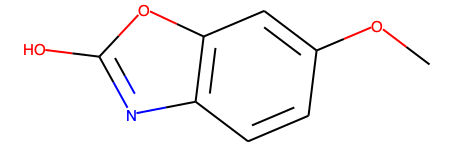

In [128]:
# But image can be displayed individually, Same image as above
test_df["mol"][0]

## Making a new column for Molblock

In [129]:
test_df["molblock"] = test_df["mol"].apply(lambda x: rdkit.Chem.MolToMolBlock(x))

In [130]:
test_df.head()

,Compound Name,InChI,mol,molblock
0,MBOA (Coixol),InChI=1S/C8H7NO3/c1-11-5-2-3-6-7(4-5)12-8(10)9...,"<img data-content=""rdkit/molecule"" src=""data:i...",MBOA (Coixol)\n RDKit 2D\n\n 12 1...
1,HDMBOA-glucoside,InChI=1S/C16H21NO10/c1-23-7-3-4-8-9(5-7)25-16(...,"<img data-content=""rdkit/molecule"" src=""data:i...",HDMBOA-glucoside\n RDKit 2D\n\n 2...
2,HDMBOA-glucoside-like (410 version - adduct?),InChI=1S/C16H21NO10/c1-23-7-3-4-8-9(5-7)25-16(...,"<img data-content=""rdkit/molecule"" src=""data:i...",HDMBOA-glucoside-like (410 version - adduct?)\...
3,DIMBOA(a),InChI=1S/C9H9NO5/c1-14-5-2-3-6-7(4-5)15-9(12)8...,"<img data-content=""rdkit/molecule"" src=""data:i...",DIMBOA(a)\n RDKit 2D\n\n 15 16 0...
4,DIMBOA(b),InChI=1S/C9H9NO5/c1-14-5-2-3-6-7(4-5)15-9(12)8...,"<img data-content=""rdkit/molecule"" src=""data:i...",DIMBOA(b)\n RDKit 2D\n\n 15 16 0...


In [131]:
test_df["molblock"][0]

'MBOA (Coixol)\n     RDKit          2D\n\n 12 13  0  0  0  0  0  0  0  0999 V2000\n    3.0000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.1240   -1.8037    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.7537   -2.4138    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n   -4.4231   -2.5537    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    1.5000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.9672   -0.3119    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n  1 11  1  0\n  2  3  2  0\n  2  5  1  0\n  3  6  1  0\n  4  5  2

In [133]:
test_df.to_csv("../2021_03_08_rdkit_test/output/Corrected_MOL_df/MOL_Block.CSV")